In [2]:
import math
import numpy as np
import cv2 as cv
from matplotlib import pyplot as plt

In [3]:
img = cv.imread('../../data/FracAtlas/images/Fractured/IMG0003785.jpg')
gray = cv.cvtColor(img,cv.COLOR_BGR2GRAY)
dns = cv.fastNlMeansDenoising(gray, None, 7, 21)
clahe = cv.createCLAHE(clipLimit=2.0, tileGridSize=(8,8))
cl1 = clahe.apply(dns)
thresh = cv.threshold(cl1,120,255,cv.THRESH_BINARY)[1]
kernel = np.ones((15,1), np.uint8)
morph = cv.morphologyEx(thresh, cv.MORPH_OPEN, kernel)
kernel = np.ones((17,3), np.uint8)
morph = cv.morphologyEx(morph, cv.MORPH_CLOSE, kernel)

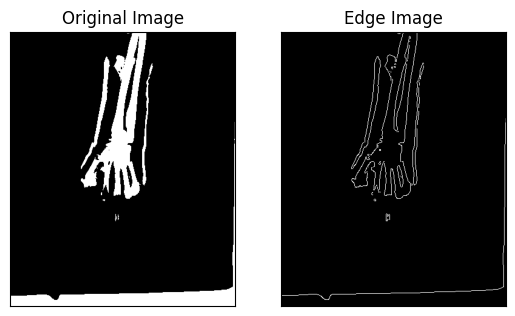

In [4]:
edges = cv.Canny(thresh, 175, 200, None, 3)
plt.subplot(121),plt.imshow(thresh,cmap = 'gray')
plt.title('Original Image'), plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(edges,cmap = 'gray')
plt.title('Edge Image'), plt.xticks([]), plt.yticks([])
plt.show()

In [5]:
result = img.copy()
linesP = cv.HoughLinesP(edges, 1, np.pi / 180, 50, None, 30, 20)
if linesP is not None:
    for i in range(0, len(linesP)):
        l = linesP[i][0]
        cv.line(result, (l[0], l[1]), (l[2], l[3]), (0,0,255), 3, cv.LINE_AA)

In [8]:
import heapq

class Node(object):
    def __init__(self, val: tuple):
        self.val = val

    def __repr__(self):
        return f'Node value: {self.val}'

    def __lt__(self, other):
        return self.val[0] < other.val[0]
    def return_val(self):
        return self.val

In [9]:
import heapq
result = img.copy()
linesP = cv.HoughLinesP(edges, 1, np.pi / 180, 50, None, 50, 10)
heap = []
if linesP is not None:
    for i in range(0, len(linesP)):
        l = linesP[i][0]
        #cv.line(result, (l[0], l[1]), (l[2], l[3]), (0,0,255), 3, cv.LINE_AA)
        heapq.heappush(heap, Node((np.linalg.norm(np.array((l[0], l[1])) - np.array((l[2], l[3]))), l)))

In [10]:
for line in heapq.nlargest(20, heap):
    _, l = line.return_val()
    cv.line(result, (l[0], l[1]), (l[2], l[3]), (0,0,255), 3, cv.LINE_AA)

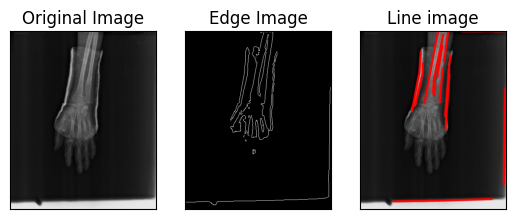

In [26]:
cdst = cv.cvtColor(result, cv.COLOR_BGR2RGB)
plt.subplot(1, 3, 1),plt.imshow(img, cmap = 'gray')
plt.title('Original Image'), plt.xticks([]), plt.yticks([])
plt.subplot(1, 3, 2),plt.imshow(edges, cmap = 'gray')
plt.title('Edge Image'), plt.xticks([]), plt.yticks([])
plt.subplot(1, 3, 3),plt.imshow(cdst)
plt.title('Line image'), plt.xticks([]), plt.yticks([])
plt.show()

In [7]:
print(cv.countNonZero(edges)/edges.shape[0])

6.81057268722467


In [44]:
print(linesP)

[[[207 432 337 428]]

 [[367 391 369 220]]

 [[261   0 368   0]]

 [[187 129 212   8]]

 [[217 217 230  61]]

 [[214  78 225   0]]

 [[197 118 210  36]]

 [[140 191 159 109]]

 [[218 251 228 109]]

 [[164 184 199   0]]

 [[ 84 434 206 432]]

 [[151 110 155  51]]

 [[203 182 211  93]]

 [[132 205 150 111]]

 [[159 114 160  81]]

 [[369 215 371 144]]

 [[186 159 189 114]]

 [[189 164 192 132]]]


In [30]:
l = linesP[0][0]
np.linalg.norm(np.array((l[0], l[1])) - np.array((l[2], l[3])))

130.06152390311286

In [42]:
def slope(x1, y1, x2, y2): # Line slope given two points:
    return (y2-y1)/(x2-x1)

def angle(s1, s2): 
    return abs(math.degrees(math.atan((s2-s1)/(1+(s2*s1)))))

slope1 = slope(linesP[0][0][0], linesP[0][0][1], linesP[0][0][2], linesP[0][0][3])
slope2 = slope(linesP[3][0][0], linesP[3][0][1], linesP[3][0][2], linesP[3][0][3])

ang = angle(slope1, slope2)
print('Angle in degrees = ', ang)

Angle in degrees =  76.56389866345471
